Netflix Shows and Movies Analysis

Importing Libraries:

In [274]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import wordcloud
import plotly.express as px

Import First Dataset:

In [275]:
First_imdb_data = pd.read_csv('./ratingsData.csv')
First_imdb_data   

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Ariel,movie,"Comedy, Crime, Drama",1988.0,tt0094675,7.4,9237.0,NaN
1,Shadows in Paradise,movie,"Comedy, Drama, Music",1986.0,tt0092149,7.4,8069.0,NaN
2,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2390861.0,NaN
3,American Beauty,movie,Drama,1999.0,tt0169547,8.3,1252487.0,NaN
4,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,528882.0,NaN
...,...,...,...,...,...,...,...,...
21905,Cheat: Unfinished Business,tv,Reality-TV,2025.0,tt32249973,4.9,233.0,NaN
21906,Cold Case: The Tylenol Murders,tv,"Crime, Documentary",2025.0,tt36614653,6.5,2167.0,NaN
21907,NaN,tv,"Animation, Crime, Mystery",1996.0,NaN,NaN,NaN,NaN
21908,NaN,tv,NaN,2014.0,NaN,NaN,NaN,NaN


In [276]:
#Making first Panda DataFrame
df = pd.DataFrame(First_imdb_data)

# testing filtering data

In [277]:
filtered_df = df.drop(columns=["availableCountries", "imdbNumVotes", "imdbId"], errors="ignore")

In [278]:
filtered_df.head()

,title,type,genres,releaseYear,imdbAverageRating
0,Ariel,movie,"Comedy, Crime, Drama",1988.0,7.4
1,Shadows in Paradise,movie,"Comedy, Drama, Music",1986.0,7.4
2,Forrest Gump,movie,"Drama, Romance",1994.0,8.8
3,American Beauty,movie,Drama,1999.0,8.3
4,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,7.6


In [279]:
filtered_df.isnull().sum()

title                 728
type                    0
genres                369
releaseYear            39
imdbAverageRating    1814
dtype: int64

In [280]:
filtered_df.dropna(inplace=True)

In [281]:
filtered_df=filtered_df[filtered_df["genres"]!=83]

In [282]:
filtered_df.head


<bound method NDFrame.head of                                           title   type  \
0                                         Ariel  movie   
1                           Shadows in Paradise  movie   
2                                  Forrest Gump  movie   
3                               American Beauty  movie   
4                             The Fifth Element  movie   
...                                         ...    ...   
21901                               Happy Crush     tv   
21902  Fred & Rose West: A British Horror Story     tv   
21905                Cheat: Unfinished Business     tv   
21906            Cold Case: The Tylenol Murders     tv   
21909                                 Entrapped     tv   

                          genres  releaseYear  imdbAverageRating  
0           Comedy, Crime, Drama       1988.0                7.4  
1           Comedy, Drama, Music       1986.0                7.4  
2                 Drama, Romance       1994.0                8.8  
3    

In [283]:
filtered_df["genres"].unique()

array(['Comedy, Crime, Drama', 'Comedy, Drama, Music', 'Drama, Romance',
       'Drama', 'Action, Adventure, Sci-Fi', 'Biography, Drama, War',
       'Drama, Western', 'Drama, Romance, Sci-Fi', 'Drama, Thriller',
       'Action, Crime, Drama', 'Drama, Mystery, Romance', 'Drama, Music',
       'Crime, Drama, Thriller', 'Drama, Sport', 'Crime, Drama',
       'Comedy, Sci-Fi', 'Comedy, Drama, Romance', 'Mystery, Thriller',
       'Action, Adventure, Drama', 'Adventure, Animation, Sci-Fi',
       'Adventure, Drama, Horror', 'Action, Adventure',
       'Drama, Music, Romance', 'Action, Comedy, Crime',
       'Action, Crime, Thriller', 'Adventure, Comedy, Sci-Fi',
       'Comedy, Crime', 'Adventure, Comedy, Family',
       'Adventure, Drama, Fantasy', 'Adventure, Animation, Fantasy',
       'Adventure, Animation, Family', 'Adventure, Comedy, Crime',
       'Comedy, Drama, Fantasy', 'Drama, Mystery, Sci-Fi',
       'Animation, Drama, Fantasy', 'Comedy, Drama', 'Crime, Thriller',
       'Horro

In [284]:
df["releaseYear"].unique()

array([1988., 1986., 1994., 1999., 1997., 2005., 1992., 2004., 2000.,
       2002., 1998., 1996., 1995., 1984., 2003., 1981., 1987., 1989.,
       1976., 1985., 1983., 2001., 1993., 1982., 2008., 2014., 1990.,
       2006., 1972., 1974., 1971., 1991., 2007., 1945., 1968., 1964.,
       1963., 1958., 1960., 1955., 1956., 1957., 1951., 1975., 1980.,
       2009., 1950., 1954., 1979., 1978., 1969., 1966., 1953., 1973.,
       1977., 1962., 1965., 1967., 2012., 1959., 1970., 1961., 2013.,
       1952., 1948., 1946., 2010., 2011., 1932., 1942., 1929., 1937.,
       1939., 1919., 1943., 1938., 1949., 2021., 1947., 1928., 1931.,
       2020., 2016., 1936., 2017., 2022., 2024., 2023., 2018., 2015.,
       2025., 2019., 1920., 1926., 1935., 1918., 1940., 1944., 1917.,
       1934., 1941., 1913., 1923., 1933., 1930., 1921.,   nan])

In [285]:
df["imdbAverageRating"].unique()

array([7.4, 8.8, 8.3, 7.6, 7. , 8.2, 8. , 7.9, 7.2, 8.1, 7.7, 8.5, 6.4,
       8.4, 5.8, 7.5, 7.1, 6.6, 7.8, 6.7, 8.9, 9. , 8.6, 6.9, 6.5, 6.2,
       9.2, 7.3, 9.3, 5.5, 6.8, 5.9, 6. , 5.7, 8.7, 5.4, 6.3, 3.7, 6.1,
       5.1, 5. , 5.3, 5.6, 3.8, 5.2, 4.7, 4.5, 3.3, 3.6, 2.5, 2.7, 4.9,
       4. , 4.6, 4.8, 4.2, 4.4, 4.3, 4.1, 2.8, 3.4, 3.9, 3.2, 3.5, 3. ,
       2.6, 3.1, nan, 1.8, 2.9, 2.2, 1.5, 2.4, 1.2, 1. , 1.9, 2. , 2.1,
       1.7, 2.3, 9.4, 9.8, 9.5, 9.1])

In [286]:
def is_from_2000s(year: int) -> bool:
    """Return True if the given year is between 2000 and 2009."""
    return 2000 <= year <= 2009

In [287]:
# Looking at the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21910 entries, 0 to 21909
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               21182 non-null  object 
 1   type                21910 non-null  object 
 2   genres              21541 non-null  object 
 3   releaseYear         21871 non-null  float64
 4   imdbId              20274 non-null  object 
 5   imdbAverageRating   20096 non-null  float64
 6   imdbNumVotes        20096 non-null  float64
 7   availableCountries  154 non-null    object 
dtypes: float64(3), object(5)
memory usage: 1.3+ MB


In [288]:
print(df.head)

<bound method NDFrame.head of                                 title   type                     genres  \
0                               Ariel  movie       Comedy, Crime, Drama   
1                 Shadows in Paradise  movie       Comedy, Drama, Music   
2                        Forrest Gump  movie             Drama, Romance   
3                     American Beauty  movie                      Drama   
4                   The Fifth Element  movie  Action, Adventure, Sci-Fi   
...                               ...    ...                        ...   
21905      Cheat: Unfinished Business     tv                 Reality-TV   
21906  Cold Case: The Tylenol Murders     tv         Crime, Documentary   
21907                             NaN     tv  Animation, Crime, Mystery   
21908                             NaN     tv                        NaN   
21909                       Entrapped     tv      Crime, Drama, Mystery   

       releaseYear      imdbId  imdbAverageRating  imdbNumVotes  \
0 

In [289]:
print(df.tail())

                                title type                     genres  \
21905      Cheat: Unfinished Business   tv                 Reality-TV   
21906  Cold Case: The Tylenol Murders   tv         Crime, Documentary   
21907                             NaN   tv  Animation, Crime, Mystery   
21908                             NaN   tv                        NaN   
21909                       Entrapped   tv      Crime, Drama, Mystery   

       releaseYear      imdbId  imdbAverageRating  imdbNumVotes  \
21905       2025.0  tt32249973                4.9         233.0   
21906       2025.0  tt36614653                6.5        2167.0   
21907       1996.0         NaN                NaN           NaN   
21908       2014.0         NaN                NaN           NaN   
21909       2022.0  tt21964626                7.0        4061.0   

      availableCountries  
21905                NaN  
21906                NaN  
21907                NaN  
21908                NaN  
21909                Na

In [290]:
#df.info()

In [291]:
#df.describe

In [292]:
#df.dtypes

In [293]:
#df.drop(columns=["availableCountries", "imdbNumVotes", "imdbId"], inplace=True)

In [294]:
df.rename(columns={'releaseYear': 'Year_Released', 'imdbAverageRating': 'IMDB Score'}, inplace=True)

In [295]:
#df.sort_values(by='title', ascending=False)

In [296]:
df = df.dropna().reset_index(drop=True)

In [297]:
df

,title,type,genres,Year_Released,imdbId,IMDB Score,imdbNumVotes,availableCountries
0,Like Stars on Earth,movie,"Drama, Family",2007.0,tt0986264,8.3,219524.0,TZ
1,Jaane Tu... Ya Jaane Na,movie,"Comedy, Drama, Romance",2008.0,tt0473367,7.4,28977.0,TZ
2,Lagaan: Once Upon a Time in India,movie,"Drama, Musical, Sport",2001.0,tt0169102,8.1,124775.0,TZ
3,Querô: A Damned Report,movie,Drama,2007.0,tt0945383,6.8,436.0,"BR, PT"
4,Captain Underpants: Epic Choice-o-Rama,movie,"Action, Adventure, Animation",2020.0,tt11604750,5.8,205.0,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE..."
...,...,...,...,...,...,...,...,...
99,The Woman in the Septic Tank 3: The Real Untol...,tv,"Comedy, Romance",2019.0,tt10573750,7.1,73.0,PH
100,Trivia Quest,tv,"Adventure, Animation, Family",2022.0,tt18393972,5.7,282.0,"AD, AG, AO, AR, AT, AU, AZ, BA, BB, BG, BM, BO..."
101,Battle Kitty,tv,"Action, Adventure, Animation",2022.0,tt10050740,6.1,373.0,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE..."
102,Sunshine Eyes,tv,Drama,2023.0,tt16026154,6.9,12.0,"AT, DE, LI"


Stats:	Count = Non-nan values, 
mean = average value, 
std = standard deviation, 
min = smallest value,
volume percentages with median at 50%

In [298]:
df['Year_Released'] = df['Year_Released'].astype('int64')

In [299]:
# Counting number of NaNs (Missing or undefined value) in Different Columns
print(df.isna().sum())

title                 0
type                  0
genres                0
Year_Released         0
imdbId                0
IMDB Score            0
imdbNumVotes          0
availableCountries    0
dtype: int64


In [300]:
#remove select columns
df = df.drop(columns=["availableCountries", "imdbNumVotes"])

# Displays remaining columns after dropping 6

In [301]:
df.head

<bound method NDFrame.head of                                                  title   type  \
0                                  Like Stars on Earth  movie   
1                              Jaane Tu... Ya Jaane Na  movie   
2                    Lagaan: Once Upon a Time in India  movie   
3                               Querô: A Damned Report  movie   
4               Captain Underpants: Epic Choice-o-Rama  movie   
..                                                 ...    ...   
99   The Woman in the Septic Tank 3: The Real Untol...     tv   
100                                       Trivia Quest     tv   
101                                       Battle Kitty     tv   
102                                      Sunshine Eyes     tv   
103                  Das Boot - Die komplette TV-Serie     tv   

                           genres  Year_Released      imdbId  IMDB Score  
0                   Drama, Family           2007   tt0986264         8.3  
1          Comedy, Drama, Romance      

In [302]:
df = df.dropna().reset_index(drop=True)

In [303]:
#consistent column names 
df.rename(columns={'releaseYear': 'Year_Released', 'listed_in': 'Genres', 'title': 'Title', 'type': 'Type', 'imdbId': 'IMDB Score'}, inplace=True)


Import Data:

In [304]:
Second_netflix_data = pd.read_csv('./netflix_titles.csv')
Second_netflix_data

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,titles,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,titles,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,titles,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,titles,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,titles,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,titles,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20-Nov-19,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,titles,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,1-Jul-19,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,titles,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,titles,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [305]:
#Making first Panda DataFrame
df2 = pd.DataFrame(Second_netflix_data)

Clean Data

In [306]:
#Dropping NaN values for second data set
df2 = df2.dropna().reset_index(drop=True)

In [307]:
print(df2.dtypes)


Unnamed: 0      object
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [308]:
print(df2.head())

  Unnamed: 0 show_id     type                          title  \
0     titles      s8    Movie                        Sankofa   
1     titles      s9  TV Show  The Great British Baking Show   
2     titles     s10    Movie                   The Starling   
3     titles     s13    Movie                   Je Suis Karl   
4     titles     s25    Movie                          Jeans   

              director                                               cast  \
0         Haile Gerima  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
1      Andy Devonshire  Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
2       Theodore Melfi  Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
3  Christian Schwochow  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
4           S. Shankar  Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   

                                             country date_added  release_year  \
0  United States, Ghana, Burkina Faso, United Kin...  24-Sep-21        

In [309]:
print(df2.tail())

     Unnamed: 0 show_id   type       title         director  \
5327     titles   s8802  Movie     Zinzana  Majid Al Ansari   
5328     titles   s8803  Movie      Zodiac    David Fincher   
5329     titles   s8805  Movie  Zombieland  Ruben Fleischer   
5330     titles   s8806  Movie        Zoom     Peter Hewitt   
5331     titles   s8807  Movie      Zubaan      Mozez Singh   

                                                   cast  \
5327  Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...   
5328  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   
5329  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...   
5330  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
5331  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   

                           country date_added  release_year rating duration  \
5327  United Arab Emirates, Jordan   9-Mar-16          2015  TV-MA   96 min   
5328                 United States  20-Nov-19          2007      R  158 min   
5329                 United S

In [310]:
#consistent column names 
df2.rename (columns={'release_year': 'Year_Released', 'listed_in': 'Genres', 'title': 'Title', 'type': 'Type', 'rating': 'Rating', 'duration': 'Duration', 'description': 'Description'}, inplace=True)


In [311]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5332 entries, 0 to 5331
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     5332 non-null   object
 1   show_id        5332 non-null   object
 2   Type           5332 non-null   object
 3   Title          5332 non-null   object
 4   director       5332 non-null   object
 5   cast           5332 non-null   object
 6   country        5332 non-null   object
 7   date_added     5332 non-null   object
 8   Year_Released  5332 non-null   int64 
 9   Rating         5332 non-null   object
 10  Duration       5332 non-null   object
 11  Genres         5332 non-null   object
 12  Description    5332 non-null   object
dtypes: int64(1), object(12)
memory usage: 541.7+ KB


In [312]:
df2.describe()

,Year_Released
count,5332.000000
mean,2012.742123
std,9.625831
min,1942.000000
25%,2011.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


In [313]:
df.to_csv('ratings.csv', index=False)

In [314]:
df2.to_csv('netflix.csv', index=False)

In [315]:
import sqlite3

In [316]:
df.head()

,Title,Type,genres,Year_Released,IMDB Score,IMDB Score
0,Like Stars on Earth,movie,"Drama, Family",2007,tt0986264,8.3
1,Jaane Tu... Ya Jaane Na,movie,"Comedy, Drama, Romance",2008,tt0473367,7.4
2,Lagaan: Once Upon a Time in India,movie,"Drama, Musical, Sport",2001,tt0169102,8.1
3,Querô: A Damned Report,movie,Drama,2007,tt0945383,6.8
4,Captain Underpants: Epic Choice-o-Rama,movie,"Action, Adventure, Animation",2020,tt11604750,5.8


In [317]:
df2.tail()


,Unnamed: 0,show_id,Type,Title,director,cast,country,date_added,Year_Released,Rating,Duration,Genres,Description
5327,titles,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",9-Mar-16,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
5328,titles,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20-Nov-19,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
5329,titles,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
5330,titles,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
5331,titles,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2-Mar-19,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [318]:
conn = sqlite3.connect('merged_data.db')
cursor = conn.cursor()

In [319]:
df = pd.read_csv('ratings.csv')
df2 = pd.read_csv('netflix.csv')


In [320]:
#Creating table called 'ratings'
cursor.execute("""
CREATE TABLE IF NOT EXISTS ratings (Title TEXT PRIMARY KEY,
    Type TEXT NOT NULL,
    Genres TEXT NOT NULL,
    Year Released INTEGER NOT NULL,
    IMDB Score REAL NOT NULL);""")


df.to_sql("ratings", conn, if_exists="replace", index=False)


print("ratings table:\n")
pd.read_sql_query("SELECT * FROM ratings", conn)


ratings table:



,Title,Type,genres,Year_Released,IMDB Score,IMDB Score.1
0,Like Stars on Earth,movie,"Drama, Family",2007,tt0986264,8.3
1,Jaane Tu... Ya Jaane Na,movie,"Comedy, Drama, Romance",2008,tt0473367,7.4
2,Lagaan: Once Upon a Time in India,movie,"Drama, Musical, Sport",2001,tt0169102,8.1
3,Querô: A Damned Report,movie,Drama,2007,tt0945383,6.8
4,Captain Underpants: Epic Choice-o-Rama,movie,"Action, Adventure, Animation",2020,tt11604750,5.8
...,...,...,...,...,...,...
99,The Woman in the Septic Tank 3: The Real Untol...,tv,"Comedy, Romance",2019,tt10573750,7.1
100,Trivia Quest,tv,"Adventure, Animation, Family",2022,tt18393972,5.7
101,Battle Kitty,tv,"Action, Adventure, Animation",2022,tt10050740,6.1
102,Sunshine Eyes,tv,Drama,2023,tt16026154,6.9


In [321]:
#PRAGMA optimize;
#runs the automatic index analysis and optimization process which helps SQLite to make better decisions and table

In [322]:
#Creating table called 'netflix'
cursor.execute("""
CREATE TABLE IF NOT EXISTS netflix (
    type TEXT NOT NULL,
    title TEXT PRIMARY KEY,
    Year Released INTEGER NOT NULL,
    rating TEXT NOT Null,
    duration TEXT NOT NULL,
    Genre TEXT NOT NULL,
    description TEXT NOT NULL)
   ;""")

In [323]:
#insert data to nexflix table
df2.to_sql("netflix", conn, if_exists="replace", index=False)

5332

In [324]:
#verify data was inserted
print("netflix table:\n")
print(pd.read_sql_query("SELECT * FROM netflix", conn))

netflix table:

     Unnamed: 0 show_id     Type                          Title  \
0        titles      s8    Movie                        Sankofa   
1        titles      s9  TV Show  The Great British Baking Show   
2        titles     s10    Movie                   The Starling   
3        titles     s13    Movie                   Je Suis Karl   
4        titles     s25    Movie                          Jeans   
...         ...     ...      ...                            ...   
5327     titles   s8802    Movie                        Zinzana   
5328     titles   s8803    Movie                         Zodiac   
5329     titles   s8805    Movie                     Zombieland   
5330     titles   s8806    Movie                           Zoom   
5331     titles   s8807    Movie                         Zubaan   

                 director                                               cast  \
0            Haile Gerima  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
1         Andy Devo

In [325]:
def query(query: str):
    return pd.read_sql(query, conn)

In [326]:
all_ratings = """ SELECT * FROM ratings
    LIMIT 5;"""

In [327]:
query(all_ratings)

,Title,Type,genres,Year_Released,IMDB Score,IMDB Score.1
0,Like Stars on Earth,movie,"Drama, Family",2007,tt0986264,8.3
1,Jaane Tu... Ya Jaane Na,movie,"Comedy, Drama, Romance",2008,tt0473367,7.4
2,Lagaan: Once Upon a Time in India,movie,"Drama, Musical, Sport",2001,tt0169102,8.1
3,Querô: A Damned Report,movie,Drama,2007,tt0945383,6.8
4,Captain Underpants: Epic Choice-o-Rama,movie,"Action, Adventure, Animation",2020,tt11604750,5.8


In [328]:
all_netflix = """SELECT * FROM netflix
    LIMIT 5;"""

In [329]:
query(all_netflix)

,Unnamed: 0,show_id,Type,Title,director,cast,country,date_added,Year_Released,Rating,Duration,Genres,Description
0,titles,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",24-Sep-21,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
1,titles,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,24-Sep-21,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
2,titles,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,24-Sep-21,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
3,titles,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",23-Sep-21,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
4,titles,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,21-Sep-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


#joining ratings table and netflix table

In [330]:
joined_tables = """SELECT *
                FROM ratings
                LEFT JOIN netflix
                on ratings.Title = netflix.Title
                LIMIT 5;
                """

In [331]:
query(joined_tables)


,Title,Type,genres,Year_Released,IMDB Score,IMDB Score.1,Unnamed: 0,show_id,Type,Title,director,cast,country,date_added,Year_Released,Rating,Duration,Genres,Description
0,Like Stars on Earth,movie,"Drama, Family",2007,tt0986264,8.3,None,None,None,None,None,None,None,None,NaN,None,None,None,None
1,Jaane Tu... Ya Jaane Na,movie,"Comedy, Drama, Romance",2008,tt0473367,7.4,titles,s1019,Movie,Jaane Tu... Ya Jaane Na,Abbas Tyrewala,"Imran Khan, Genelia D'Souza, Manjari Fadnis, A...",India,17-Apr-21,2008.0,TV-14,147 min,"Comedies, International Movies, Music & Musicals",Soft-spoken Jai and spitfire beauty Aditi coul...
2,Lagaan: Once Upon a Time in India,movie,"Drama, Musical, Sport",2001,tt0169102,8.1,None,None,None,None,None,None,None,None,NaN,None,None,None,None
3,Querô: A Damned Report,movie,Drama,2007,tt0945383,6.8,None,None,None,None,None,None,None,None,NaN,None,None,None,None
4,Captain Underpants: Epic Choice-o-Rama,movie,"Action, Adventure, Animation",2020,tt11604750,5.8,None,None,None,None,None,None,None,None,NaN,None,None,None,None


In [332]:
#import matplot

In [333]:
best_director = pd.read_sql_query

In [347]:
best_director = """
    SELECT Title, director, Year_Released 
    FROM joined_tables
    WHERE director IS NOT NULL
    ORDER BY
        Title,
        director ASC,
        Year_Released DESC
    LIMIT 30;
    """


In [335]:

data_for_first_graph = """
SELECT Title, genres, Year_Released, Rating
    FROM joined_tables
    WHERE Title is not null
    ORDER BY Rating DESC
    LIMIT 10;
    """

<Axes: title={'center': 'Genre Counts'}, xlabel='genres'>

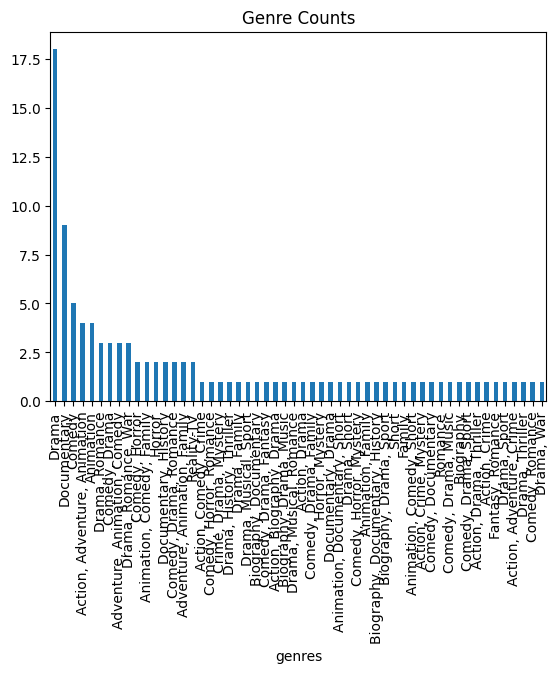

In [340]:
df['genres'].value_counts().plot(
    kind='bar',
    title='Genre Counts'
)

<Axes: title={'center': 'Many Genres'}, xlabel='genres'>

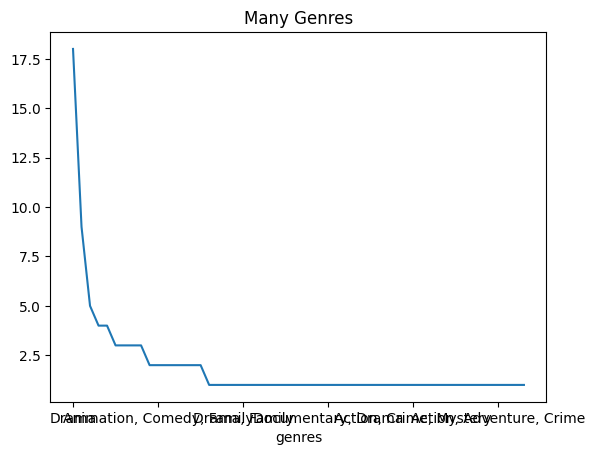

In [355]:
df['genres'].value_counts().plot(
    kind='line',
    title='Many Genres'
)

<Axes: title={'center': 'Colorful Genre'}, ylabel='count'>

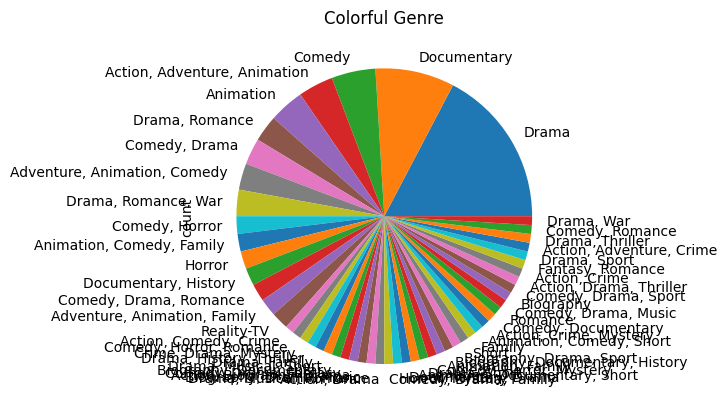

In [358]:
df['genres'].value_counts().plot(
    kind='pie',
    title='Colorful Genre'
)